In [50]:
#import packages 

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats import linregress
import netCDF4
import xarray as xr


In [95]:
ds = pd.read_excel('Copy of Redo CM Atlantic Bulk Sediment Workup.xlsx', sheet_name = 'CM workup')

df = pd.read_excel('ziverisedsworkupCMbatch2.xlsx', sheet_name = 'CM workup batch2')

dt = pd.read_excel('ziverisedsworkupCMbatch2.xlsx', sheet_name = 'complied batch 1 and 2 CM ')

dr = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'foram_cocco_workup')

dp = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'omegac_workup', header =1)

ds20 = xr.open_dataset('woa23_decav_t04_01 (1)-Copy1.nc', decode_times = False)

d1 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 1 ODV')
d3 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 3 ODV temps')
d4 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 4 ODV temps')
d6 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 6 ODV temps')
d8 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 8 ODV temps')
d9 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 9 ODV temps')
d10 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 10 ODV temps')
d11 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 11 ODV temps')
d12 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 12 ODV temps')
d16 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 16 ODV temps')
d16_2 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 16.2 ODV temps')
d18 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 18 ODV temps')

print(dp.columns)

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


In [97]:
#indexing variables

ic1 = ds['%IC']
ic2 = df['%IC']

tc1 = ds['%TC']
tc2 = df['%TC']

toc1 = ds['fixed %TOC'].dropna()
toc2 = df['TOC% fixed'].dropna()

toc_tc1 = (toc1/tc1).dropna()
toc_tc2 = (toc2/tc2).dropna()

d13c_1 = ds['          Delta CRDS'].dropna()
d13c_2 = df['          Delta CRDS'].dropna()

d13c_1 = d13c_1[0:12]
d13c_2 = d13c_2[0:12]

d13c_avg = dt['d13c']
tc_avg = dt['TC%']
toc_avg = dt['TOC%']
toc_tc_avg = (toc_avg/tc_avg)

z = dr['depth ']

s = dt['sample']

lat = dp['Lat']
lon = dp['Lon']

t20 = ds20['t_an']

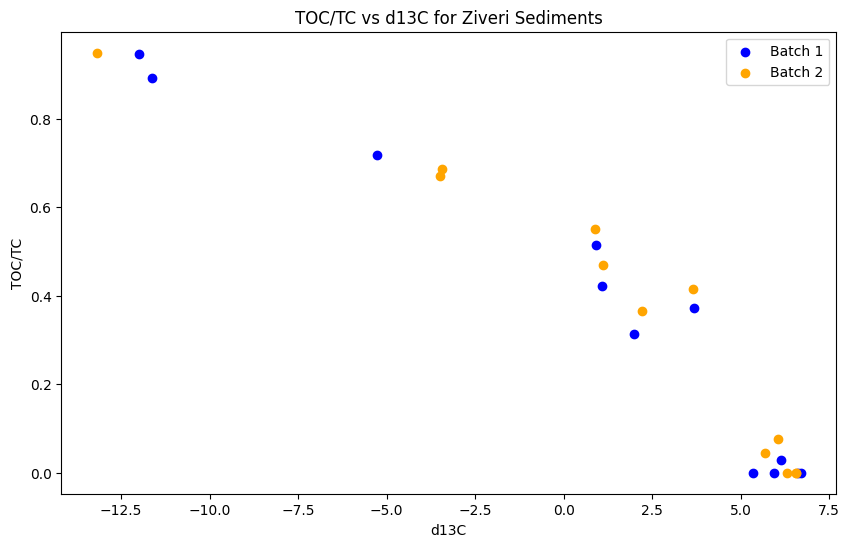

In [99]:
plt.figure(figsize=(10,6))

plt.scatter(d13c_1,toc_tc1, color = 'b', label = 'Batch 1')
plt.scatter(d13c_2,toc_tc2, color = 'orange', label = 'Batch 2')
plt.xlabel('d13C')
plt.ylabel('TOC/TC')
plt.title('TOC/TC vs d13C for Ziveri Sediments')
plt.legend()

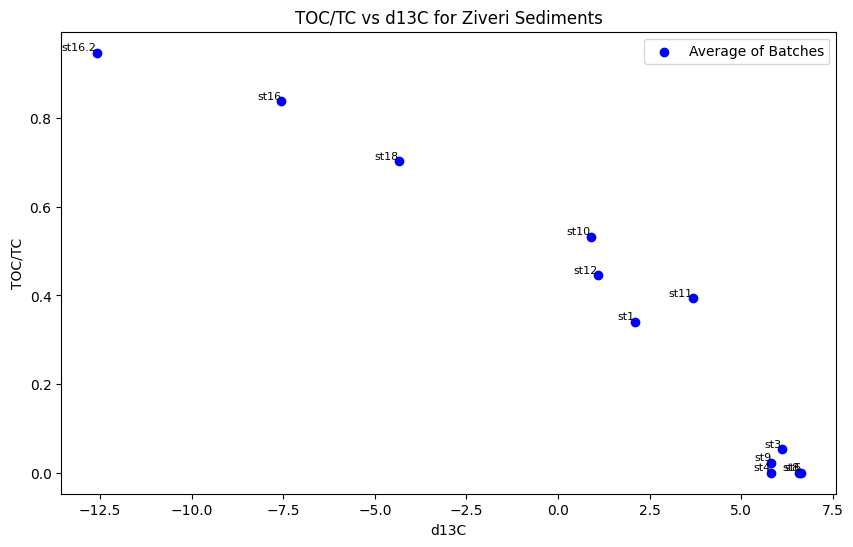

In [101]:

plt.figure(figsize=(10,6))

plt.scatter(d13c_avg,toc_tc_avg, color = 'b', label = 'Average of Batches')

plt.xlabel('d13C')
plt.ylabel('TOC/TC')
plt.title('TOC/TC vs d13C for Ziveri Sediments')
plt.legend()

for x, y, label in zip(d13c_avg, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

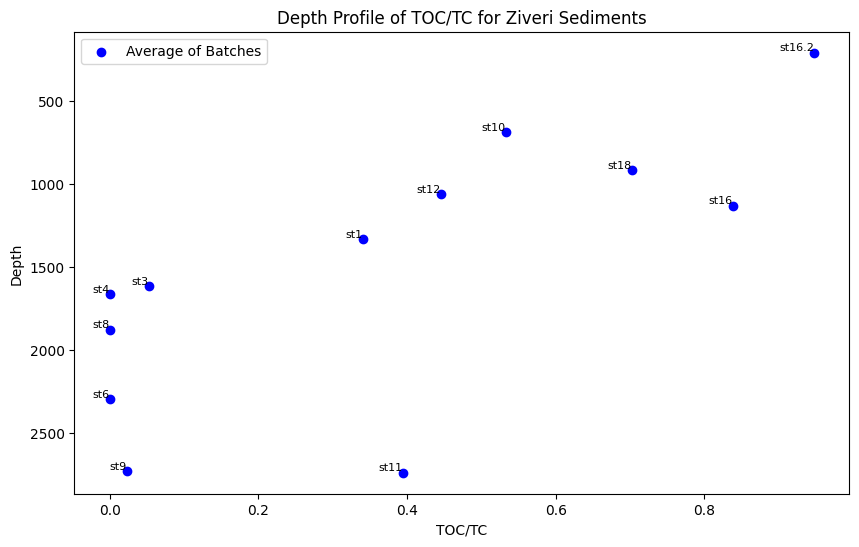

In [103]:
plt.figure(figsize=(10,6))

plt.scatter(toc_tc_avg, z, color = 'b', label = 'Average of Batches')

plt.xlabel('TOC/TC')
plt.ylabel('Depth')
plt.title('Depth Profile of TOC/TC for Ziveri Sediments')
plt.legend()
plt.gca().invert_yaxis()
for x, y, label in zip( toc_tc_avg,z, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

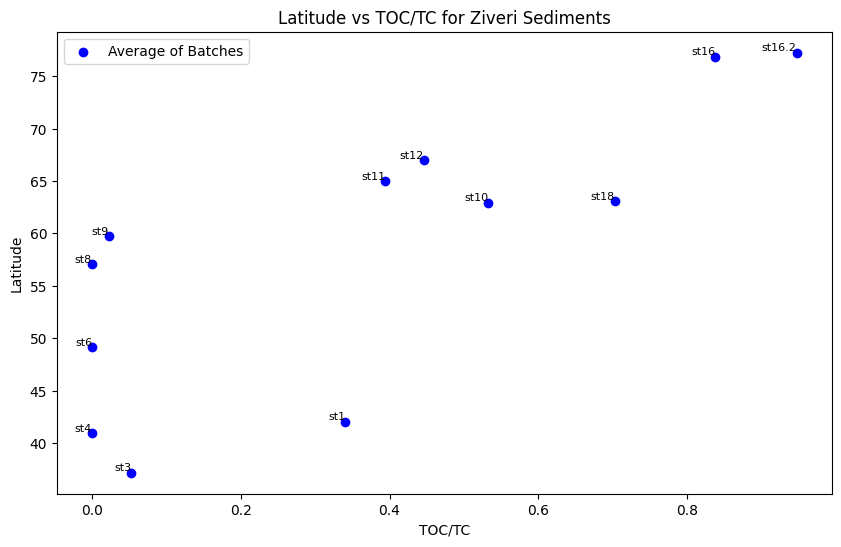

In [105]:
plt.figure(figsize=(10,6))

plt.scatter(toc_tc_avg, lat, color = 'b', label = 'Average of Batches')

plt.xlabel('TOC/TC')
plt.ylabel('Latitude')
plt.title('Latitude vs TOC/TC for Ziveri Sediments')
plt.legend()

for x, y, label in zip( toc_tc_avg,lat, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

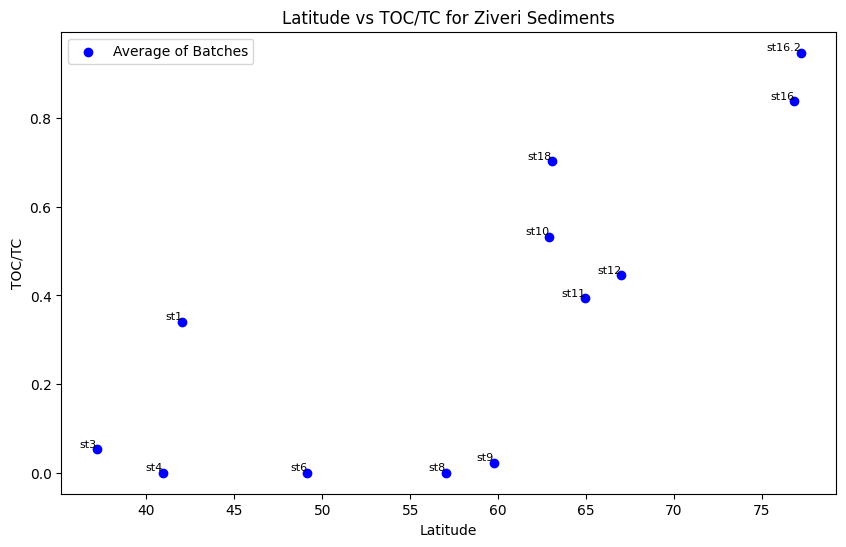

In [107]:
plt.figure(figsize=(10,6))

plt.scatter(lat, toc_tc_avg, color = 'b', label = 'Average of Batches')

plt.ylabel('TOC/TC')
plt.xlabel('Latitude')
plt.title('Latitude vs TOC/TC for Ziveri Sediments')
plt.legend()

for x, y, label in zip( lat, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

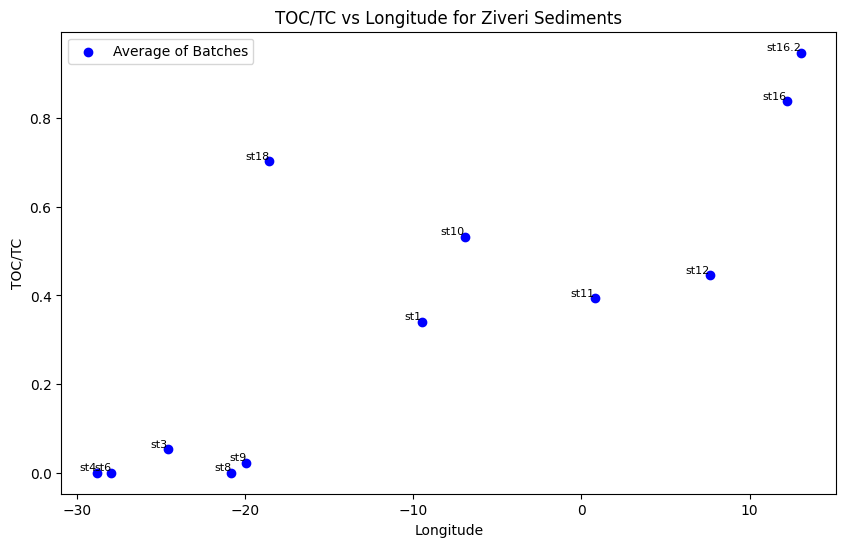

In [109]:
plt.figure(figsize=(10,6))

plt.scatter(lon, toc_tc_avg, color = 'b', label = 'Average of Batches')

plt.ylabel('TOC/TC')
plt.xlabel('Longitude')
plt.title('TOC/TC vs Longitude for Ziveri Sediments')
plt.legend()

for x, y, label in zip(lon, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

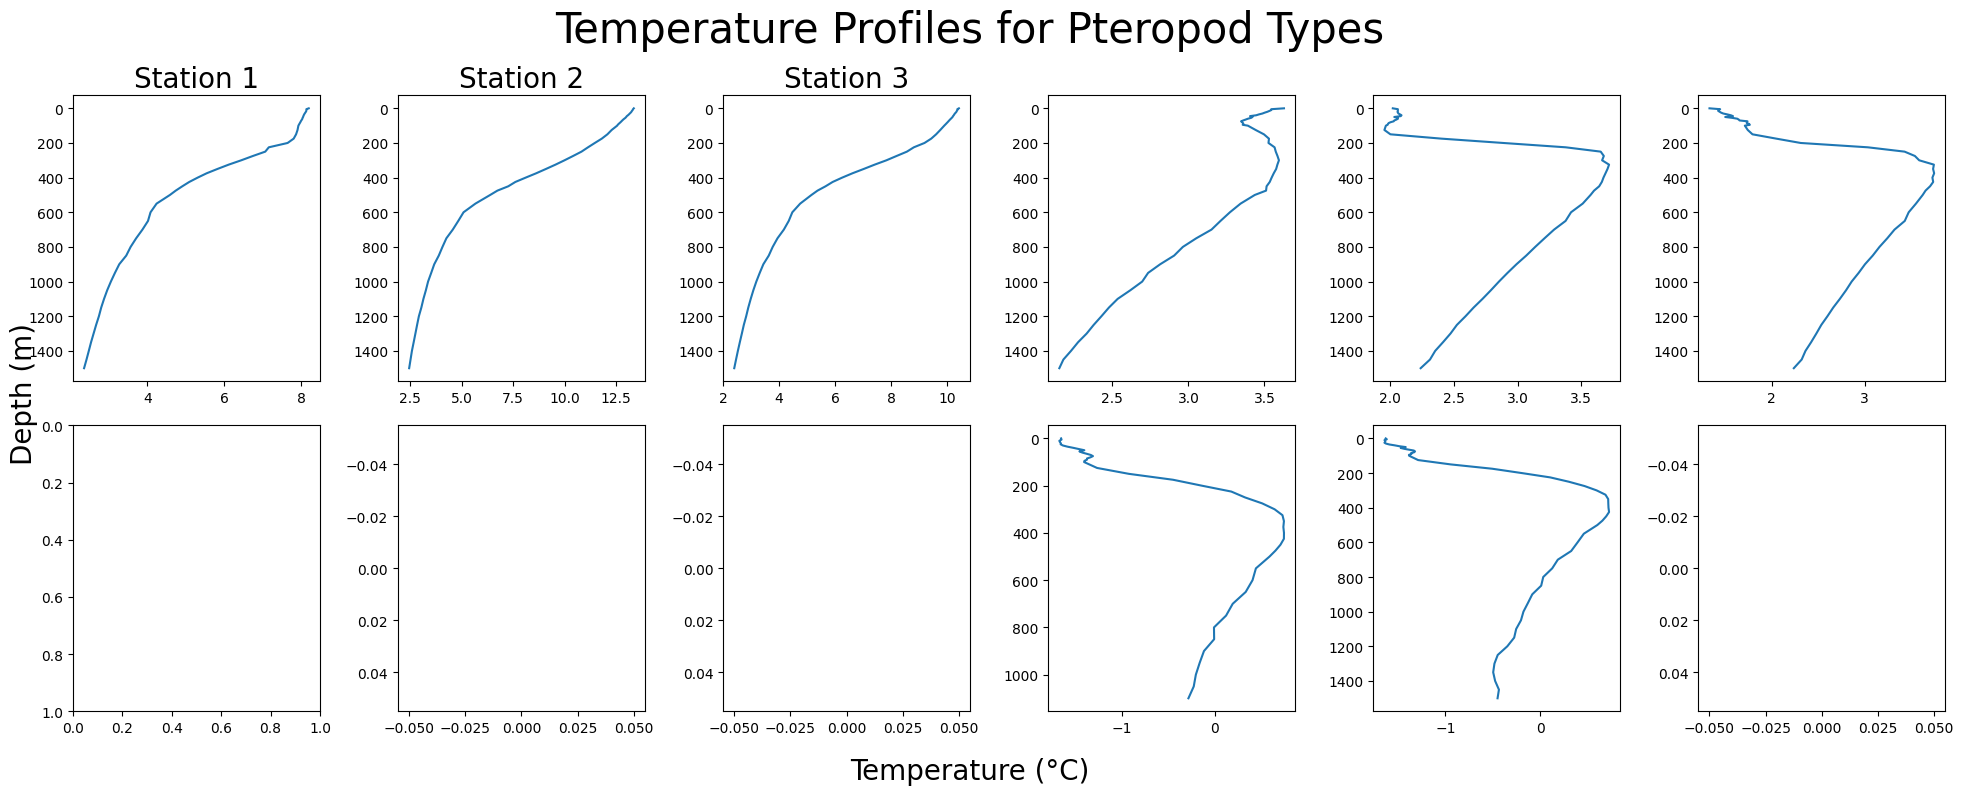

In [111]:
#graph 1: T profiles at all pteropod locations

#select data for correct lat/lons 
#WOA data needs to be in 360 degrees
t1 = t20.sel(lat=42.02293333, lon=350.50565, method='nearest')  
t3 = t20.sel(lat=37.15655, lon=335.4079333, method='nearest')
t4 = t20.sel(lat=40.93448333, lon=331.16065, method='nearest')
t6 = t20.sel(lat=49.14403333, lon=332.0476667, method='nearest')
t8 = t20.sel(lat=57.03328333, lon=339.176, method='nearest')
t9 = t20.sel(lat=59.75353333, lon=340.0784667, method='nearest')

t10 = t20.sel(lat=62.92333333, lon=353.0605667, method='nearest')
t11 = t20.sel(lat=64.95403333, lon=360.7932333, method='nearest')
t12 = t20.sel(lat=67.0063, lon=367.6499333, method='nearest')

t16 = t20.sel(lat=76.8567, lon=372.19845, method='nearest')
t16_2 = t20.sel(lat=77.233, lon=373.0616, method='nearest')

t18 = t20.sel(lat=63.05391667, lon=341.4435333, method='nearest')


#index depths and flatten data
z1 = t1['depth']
t1 = t1.values.flatten()

z3 = t3['depth']
t3 = t3.values.flatten()

z4 = t4['depth']
t4 = t4.values.flatten()

z6 = t6['depth']
t6 = t6.values.flatten()

z8 = t8['depth']
t8 = t8.values.flatten()

z9 = t9['depth']
t9 = t9.values.flatten()

z10 = t10['depth']
t10 = t10.values.flatten()

z11 = t11['depth']
t11 = t11.values.flatten()

z12 = t12['depth']
t12 = t12.values.flatten()

z16 = t16['depth']
t16 = t16.values.flatten()

z16_2 = t16_2['depth']
t16_2 = t16_2.values.flatten()

z18 = t18['depth']
t18 = t18.values.flatten()


# for z10, val in zip(z11, t11):
#     print(f"Depth: {z11.values} m → Temp: {val:.2f} °C")

fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(t1, z1)

axes[0,1].plot(t3, z3)

axes[0,2].plot(t4, z4)

axes[0,3].plot(t6, z6)

axes[0,4].plot(t8, z8)

axes[0,5].plot(t9, z9)

#axes[1,0].plot(t10, z10)

axes[1,1].plot(t11, z11)

axes[1,2].plot(t12, z12)

axes[1,3].plot(t16, z16)

axes[1,4].plot(t16_2, z16_2)

axes[1,5].plot(t18, z18)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("Temperature (°C)", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Temperature Profiles for Pteropod Types', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 2", fontsize =20)

axes[0,2].set_title("Station 3", fontsize =20)

fig.tight_layout()

plt.show()

Depth: 0.0 m → Temp: -1.63 °C
Depth: 5.0 m → Temp: -1.62 °C
Depth: 10.0 m → Temp: -1.64 °C
Depth: 15.0 m → Temp: -1.63 °C
Depth: 20.0 m → Temp: -1.64 °C
Depth: 25.0 m → Temp: -1.64 °C
Depth: 30.0 m → Temp: -1.63 °C
Depth: 35.0 m → Temp: -1.59 °C
Depth: 40.0 m → Temp: -1.54 °C
Depth: 45.0 m → Temp: -1.49 °C
Depth: 50.0 m → Temp: -1.42 °C
Depth: 55.0 m → Temp: -1.47 °C
Depth: 60.0 m → Temp: -1.44 °C
Depth: 65.0 m → Temp: -1.39 °C
Depth: 70.0 m → Temp: -1.33 °C
Depth: 75.0 m → Temp: -1.32 °C
Depth: 80.0 m → Temp: -1.33 °C
Depth: 85.0 m → Temp: -1.36 °C
Depth: 90.0 m → Temp: -1.36 °C
Depth: 95.0 m → Temp: -1.39 °C
Depth: 100.0 m → Temp: -1.38 °C
Depth: 125.0 m → Temp: -1.29 °C
Depth: 150.0 m → Temp: -0.95 °C
Depth: 175.0 m → Temp: -0.51 °C
Depth: 200.0 m → Temp: -0.20 °C
Depth: 225.0 m → Temp: 0.11 °C
Depth: 250.0 m → Temp: 0.30 °C
Depth: 275.0 m → Temp: 0.47 °C
Depth: 300.0 m → Temp: 0.60 °C
Depth: 325.0 m → Temp: 0.69 °C
Depth: 350.0 m → Temp: 0.72 °C
Depth: 375.0 m → Temp: 0.72 °C
Depth

ValueError: x and y must have same first dimension, but have shapes (57,) and (1,)

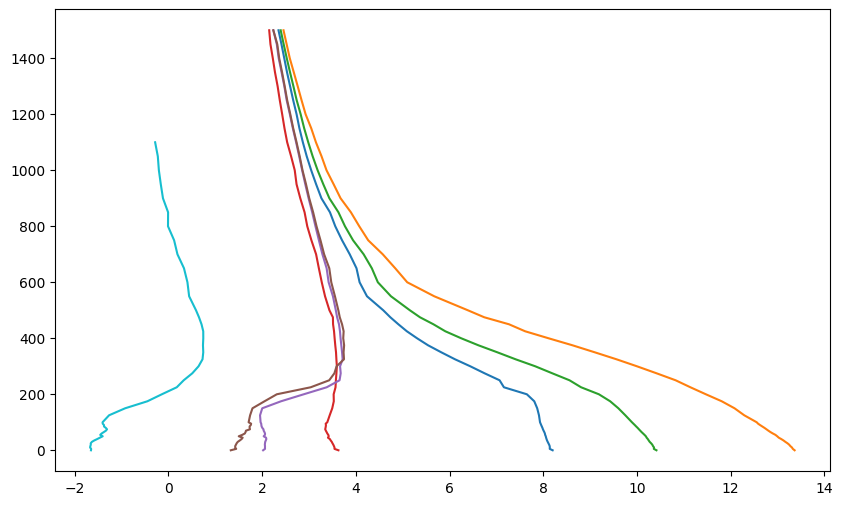

In [112]:
#graph 1: T profiles at all pteropod locations

#select data for correct lat/lons 
#WOA data needs to be in 360 degrees
t1 = t20.sel(lat=42.02293333, lon=350.50565, method='nearest')  
t3 = t20.sel(lat=37.15655, lon=335.4079333, method='nearest')
t4 = t20.sel(lat=40.93448333, lon=331.16065, method='nearest')
t6 = t20.sel(lat=49.14403333, lon=332.0476667, method='nearest')
t8 = t20.sel(lat=57.03328333, lon=339.176, method='nearest')
t9 = t20.sel(lat=59.75353333, lon=340.0784667, method='nearest')

t10 = t20.sel(lat=62.92333333, lon=353.0605667, method='nearest')

t11 = t20.sel(lat=64.95403333, lon=360.7932333, method='nearest')
t12 = t20.sel(lat=67.0063, lon=367.6499333, method='nearest')
t16 = t20.sel(lat=76.8567, lon=372.19845, method='nearest')
t16_2 = t20.sel(lat=77.233, lon=373.0616, method='nearest')
t18 = t20.sel(lat=63.05391667, lon=341.4435333, method='nearest')

#index depths and flatten data
z1 = t1['depth']
t1 = t1.values.flatten()



z3 = t3['depth']
t3 = t3.values.flatten()

z4 = t4['depth']
t4 = t4.values.flatten()

z6 = t6['depth']
t6 = t6.values.flatten()

z8 = t8['depth']
t8 = t8.values.flatten()

z9 = t9['depth']
t9 = t9.values.flatten()

z10 = t10['depth']
t10 = t10.values.flatten()

z11 = t11['depth']
t11 = t11.values.flatten()

z12 = t12['depth']
t12 = t12.values.flatten()

z16 = t16['depth']
t16 = t16.values.flatten()

z16_2 = t16_2['depth']
t16_2 = t16_2.values.flatten()

z18 = t18['depth']
t18 = t18.values.flatten()


for z16_2, val in zip(z16_2, t16_2):
    print(f"Depth: {z16_2.values} m → Temp: {val:.2f} °C")

plt.figure (figsize = (10,6))

plt.plot(t1, z1, label ='St1')

plt.plot(t3, z3, label ='St3')

plt.plot(t4, z4, label ='St4')

plt.plot(t6, z6, label ='St6')

plt.plot(t8, z8, label ='St8')

plt.plot(t9, z9, label ='St9')

plt.plot(t10, z10, label ='St10')

plt.plot(t11, z11, label ='St11')

plt.plot(t12, z12, label ='St12')

plt.plot(t16, z16, label ='St16')

plt.plot(t16_2, z16_2, label ='St16.2')

plt.plot(t18, z18, label ='St18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station Temperature Profles", fontsize =20)

plt.show()

In [ ]:
#graph: odv and woa temps for stations 

#select data for correct lat/lons 
#WOA data needs to be in 360 degrees
t1 = t20.sel(lat=42.02293333, lon=350.50565, method='nearest')

t3 = d3['TEMPERATURE [DEG C]']
t4 = d4['TEMPERATURE [DEG C]']
t6 = d6['TEMPERATURE [DEG C]']
t8 = d8['TEMPERATURE [DEG C]']
t9 = d9['TEMPERATURE [DEG C]']
t10 = d10['TEMPERATURE [DEG C]']
t11 = d11['TEMPERATURE [DEG C]']
t12 = d12['TEMPERATURE [DEG C]']
t16 = d16['TEMPERATURE [DEG C]']

t16_2 = d16_2['TEMPERATURE [DEG C]']

t18 = d18['TEMPERATURE [DEG C]']


#index depths and flatten data
z1 = t1['depth']
t1 = t1.values.flatten()

z3 = d3['DEPTH [M]']


z4 = d4['DEPTH [M]']


z6 = d6['DEPTH [M]']


z8 = d8['DEPTH [M]']


z9 = d9['DEPTH [M]']


z10 = d10['DEPTH [M]']


z11 = d11['DEPTH [M]']


z12 = d12['DEPTH [M]']


z16 = d16['DEPTH [M]']


z16_2 = d16_2['DEPTH [M]']

z18 = d18['DEPTH [M]']



# for z10, val in zip(z11, t11):
#     print(f"Depth: {z11.values} m → Temp: {val:.2f} °C")

fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(t1, z1)

axes[0,1].plot(t3, z3)

axes[0,2].plot(t4, z4)

axes[0,3].plot(t6, z6)

axes[0,4].plot(t8, z8)

axes[0,5].plot(t9, z9)

axes[1,0].plot(t10, z10)

axes[1,1].plot(t11, z11)

axes[1,2].plot(t12, z12)

axes[1,3].plot(t16, z16)

axes[1,4].plot(t16_2, z16_2)

axes[1,5].plot(t18, z18)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("Temperature (°C)", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Station Temperature Profiles', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)

axes[0,0].axhline(y=1333, color = 'Black', linestyle= '--')

axes[0,1].axhline(y=1616, color = 'Black', linestyle= '--')

axes[0,2].axhline(y=1664, color = 'Black', linestyle= '--')

axes[0,3].axhline(y=2296, color = 'Black', linestyle= '--')

axes[0,4].axhline(y=1877, color = 'Black', linestyle= '--')

axes[0,5].axhline(y=2730, color = 'Black', linestyle= '--')

axes[1,0].axhline(y=688, color = 'Black', linestyle= '--')

axes[1,1].axhline(y=2740, color = 'Black', linestyle= '--')

axes[1,2].axhline(y=1060, color = 'Black', linestyle= '--')

axes[1,3].axhline(y=1132, color = 'Black', linestyle= '--')

axes[1,4].axhline(y=209, color = 'Black', linestyle= '--')

axes[1,5].axhline(y=918, color = 'Black', linestyle= '--')


fig.tight_layout()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (57,) and (1,)

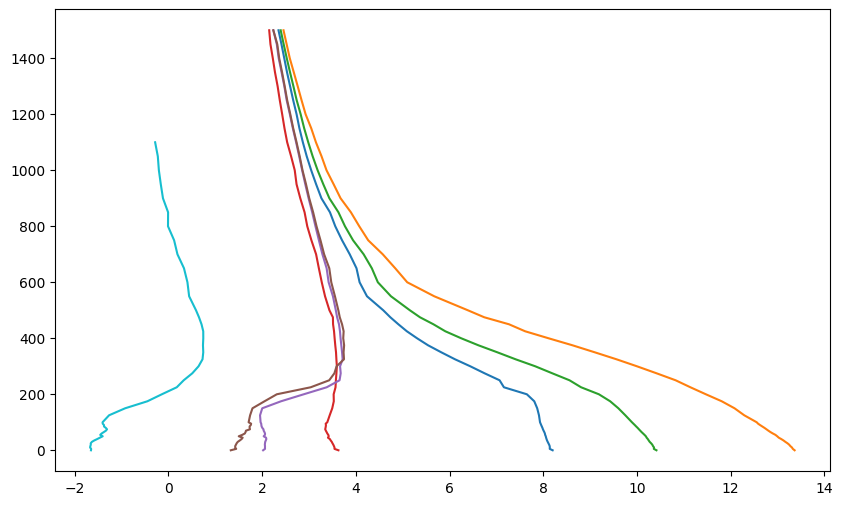

In [115]:


plt.figure (figsize = (10,6))

plt.plot(t1, z1, label ='St 1')

plt.plot(t3, z3, label ='St 3')

plt.plot(t4, z4, label ='St 4')

plt.plot(t6, z6, label ='St 6')

plt.plot(t8, z8, label ='St 8')

plt.plot(t9, z9, label ='St 9')

plt.plot(t10, z10, label ='St 10')

plt.plot(t11, z11, label ='St 11')

plt.plot(t12, z12, label ='St 12')

plt.plot(t16, z16, label ='St 16')

plt.plot(t16_2, z16_2, label ='St 16.2')

plt.plot(t18, z18, label ='St 18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station Temperature Profles", fontsize =20)

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


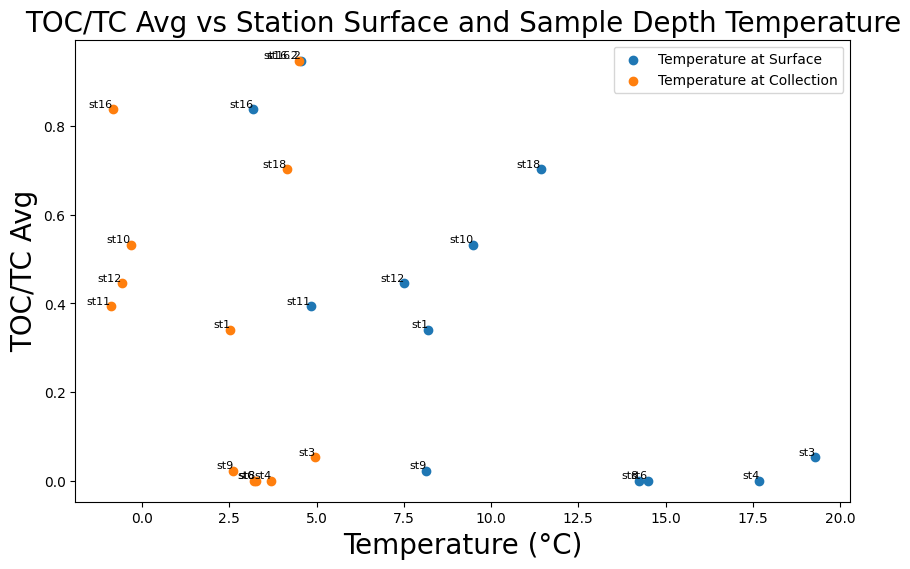

In [117]:

plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']

plt.scatter(ts, toc_tc_avg, label ='Temperature at Surface')
plt.scatter(td, toc_tc_avg, label ='Temperature at Collection')




plt.legend(loc = 'upper right') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface and Sample Depth Temperature", fontsize =20)

for x, y, label in zip(ts, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(td, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


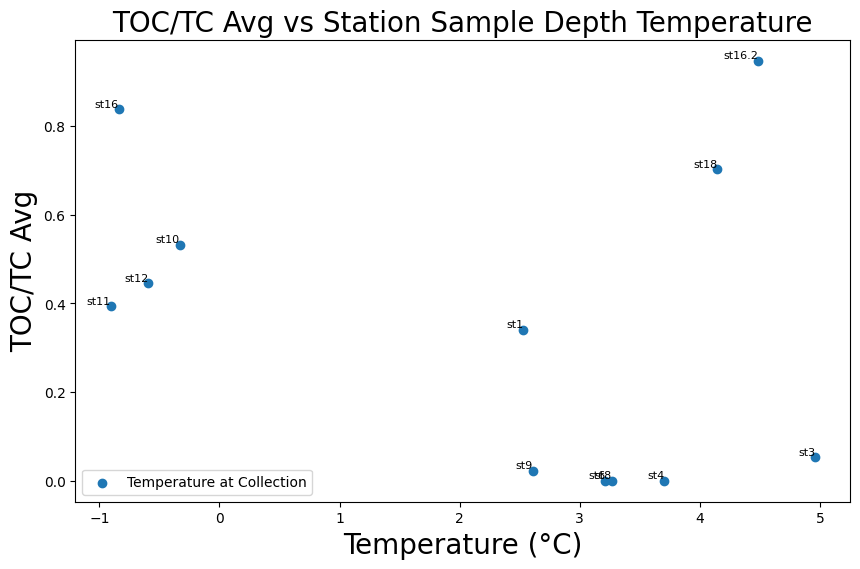

In [142]:

plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']


plt.scatter(td, toc_tc_avg, label ='Temperature at Collection')




plt.legend(loc = 'lower left') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Sample Depth Temperature", fontsize =20)


for x, y, label in zip(td, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


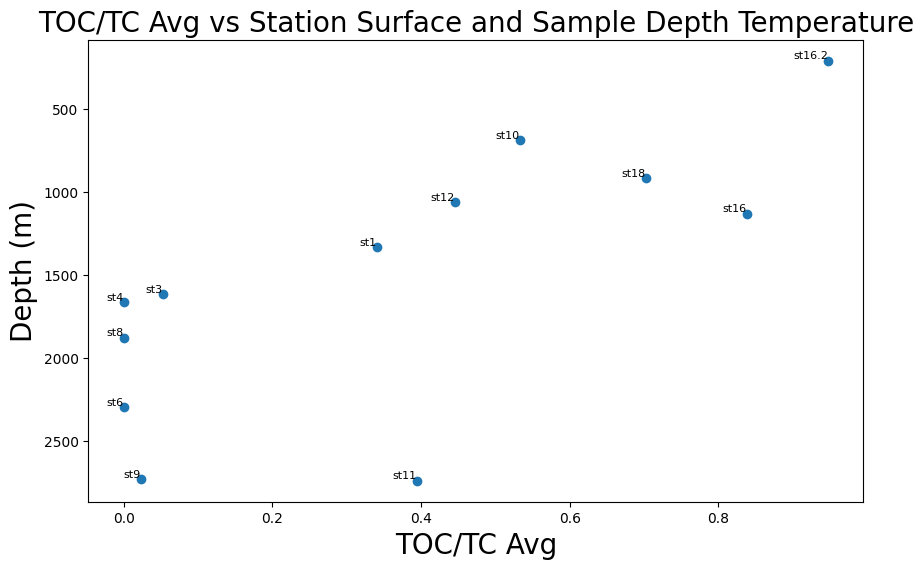

In [121]:

plt.figure (figsize = (10,6))
print(dp.columns)
z = dp['depth ']
plt.scatter(toc_tc_avg, z, label ='Temperature at Surface')



plt.gca().invert_yaxis()


plt.ylabel("Depth (m)", fontsize =20)
plt.xlabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface and Sample Depth Temperature", fontsize =20)

for x, y, label in zip(toc_tc_avg,z, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

In [123]:
#indexing omega C
o1 = d1['Omega~_C(P,T,ALK,DIC)']
zo1 = d1['DEPTH [M].1']
o3 = d3['Omega~_C(P,T,ALK,DIC)']
zo3 = d3['DEPTH [M].1']
o4 = d4['Omega~_C(P,T,ALK,DIC)']
zo4 = d4['DEPTH [M].1']
o6 = d6['Omega~_C(P,T,ALK,DIC)']
zo6 = d6['DEPTH [M].1']
o8 = d8['Omega~_C(P,T,ALK,DIC)']
zo8 = d8['DEPTH [M].1']
o9 = d9['Omega~_C(P,T,ALK,DIC)']
zo9 = d9['DEPTH [M].1']
o10 = d10['Omega~_C(P,T,ALK,DIC)']
zo10 = d10['DEPTH [M].1']
o11 = d11['Omega~_C(P,T,ALK,DIC)']
zo11 = d11['DEPTH [M].1']
o12 = d12['Omega~_C(P,T,ALK,DIC)']
zo12 = d12['DEPTH [M].1']
o16 = d16['Omega~_C(P,T,ALK,DIC)']
zo16 = d16['DEPTH [M].1']
o16_2 = d16_2['Omega~_C(P,T,ALK,DIC)']
zo16_2 = d16_2['DEPTH [M].1']
o18 = d18['Omega~_C(P,T,ALK,DIC)']
zo18 = d18['DEPTH [M].1']

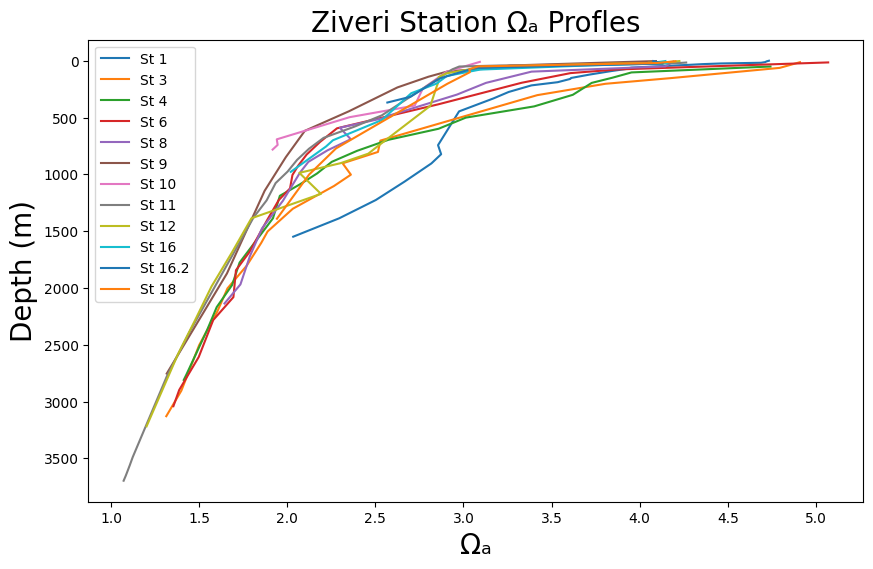

In [125]:
#graph of odv omegac vs depths for stations

plt.figure (figsize = (10,6))

plt.plot(o1, zo1, label ='St 1')

plt.plot(o3, zo3, label ='St 3')

plt.plot(o4, zo4, label ='St 4')

plt.plot(o6, zo6, label ='St 6')

plt.plot(o8, zo8, label ='St 8')

plt.plot(o9, zo9, label ='St 9')

plt.plot(o10, zo10, label ='St 10')

plt.plot(o11, zo11, label ='St 11')

plt.plot(o12, zo12, label ='St 12')

plt.plot(o16, zo16, label ='St 16')

plt.plot(o16_2, zo16_2, label ='St 16.2')

plt.plot(o18, zo18, label ='St 18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("\u03A9\u2090", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station \u03A9\u2090 Profles", fontsize =20)

plt.show()

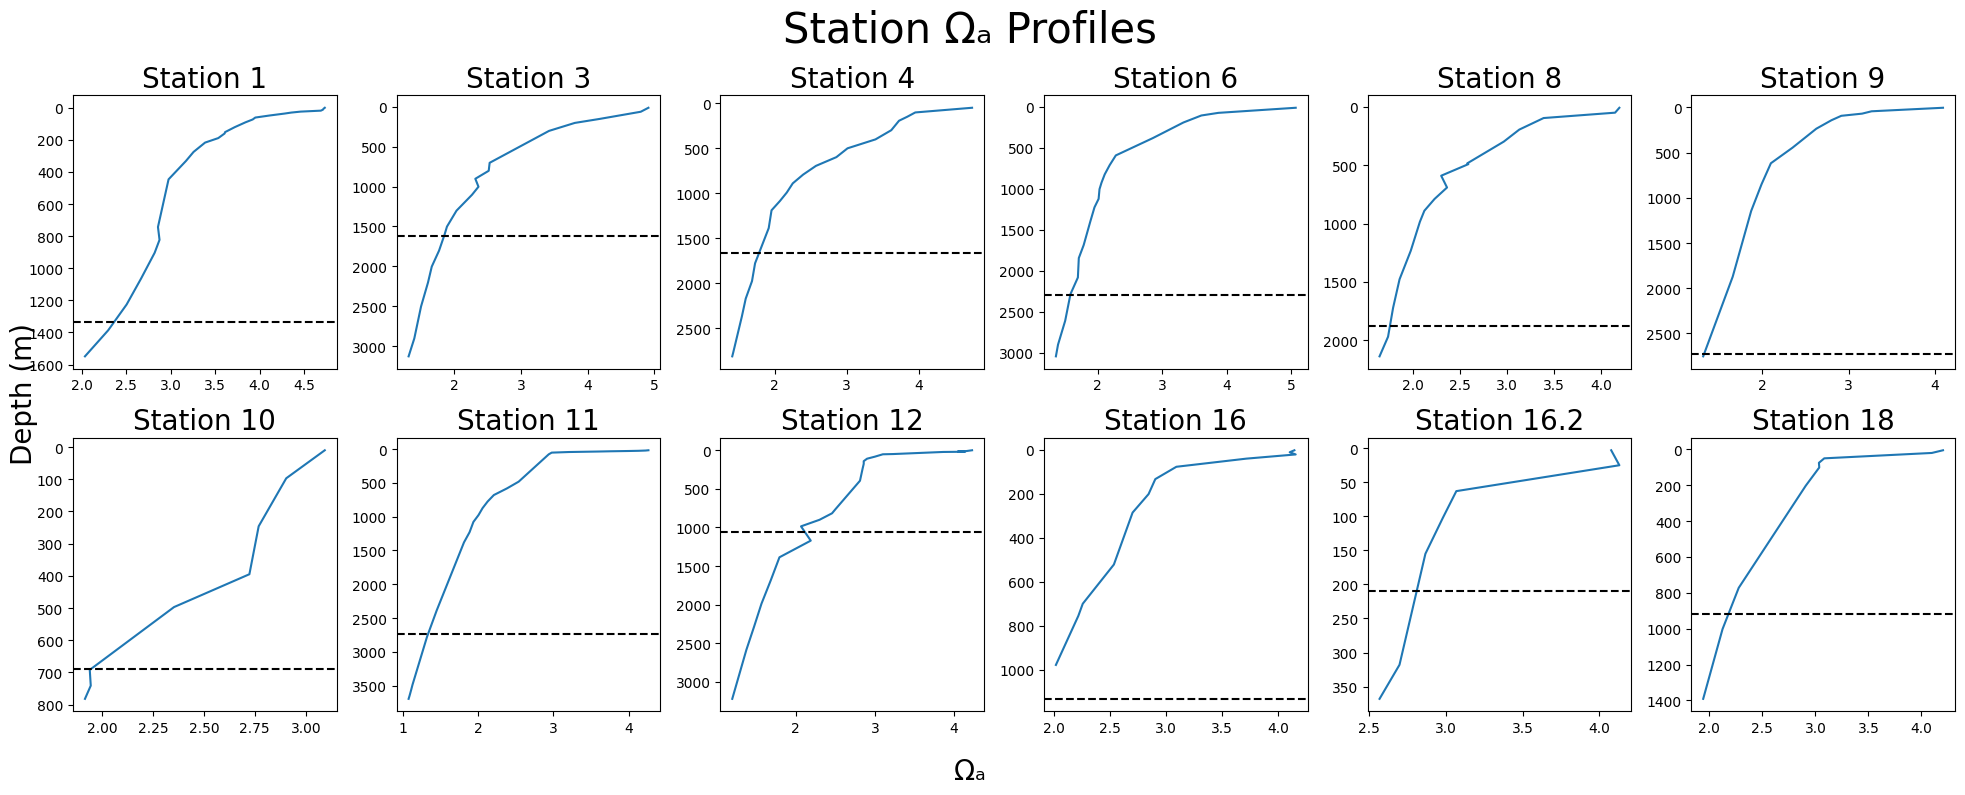

In [144]:
#graph: odv omega c vs depth 

fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(o1, zo1)

axes[0,1].plot(o3, zo3)

axes[0,2].plot(o4, zo4)

axes[0,3].plot(o6, zo6)

axes[0,4].plot(o8, zo8)

axes[0,5].plot(o9, zo9)

axes[1,0].plot(o10, zo10)

axes[1,1].plot(o11, zo11)

axes[1,2].plot(o12, zo12)

axes[1,3].plot(o16, zo16)

axes[1,4].plot(o16_2, zo16_2)

axes[1,5].plot(o18, zo18)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("\u03A9\u2090", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Station \u03A9\u2090 Profiles', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)

axes[0,0].axhline(y=1333, color = 'Black', linestyle= '--')

axes[0,1].axhline(y=1616, color = 'Black', linestyle= '--')

axes[0,2].axhline(y=1664, color = 'Black', linestyle= '--')

axes[0,3].axhline(y=2296, color = 'Black', linestyle= '--')

axes[0,4].axhline(y=1877, color = 'Black', linestyle= '--')

axes[0,5].axhline(y=2730, color = 'Black', linestyle= '--')

axes[1,0].axhline(y=688, color = 'Black', linestyle= '--')

axes[1,1].axhline(y=2740, color = 'Black', linestyle= '--')

axes[1,2].axhline(y=1060, color = 'Black', linestyle= '--')

axes[1,3].axhline(y=1132, color = 'Black', linestyle= '--')

axes[1,4].axhline(y=209, color = 'Black', linestyle= '--')

axes[1,5].axhline(y=918, color = 'Black', linestyle= '--')


fig.tight_layout()

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


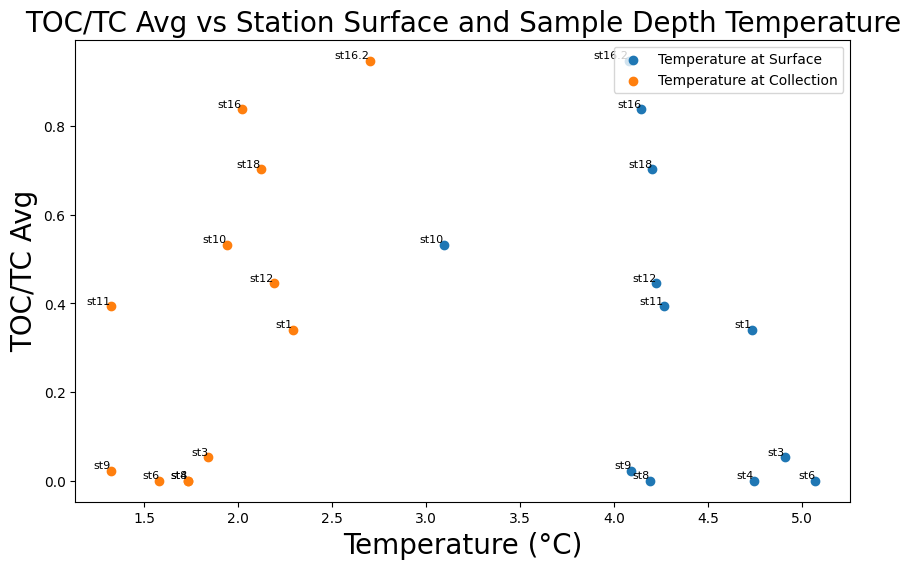

In [140]:
od = dp['omega C at depth']
os = dp['omegac at surface']



plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']

plt.scatter(os, toc_tc_avg, label ='\u03A9\u2090 at Surface')
plt.scatter(od, toc_tc_avg, label ='Temperature at Collection')




plt.legend(loc = 'upper right') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface and Sample Depth \u03A9\u2090", fontsize =20)

for x, y, label in zip(os, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(od, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')


Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


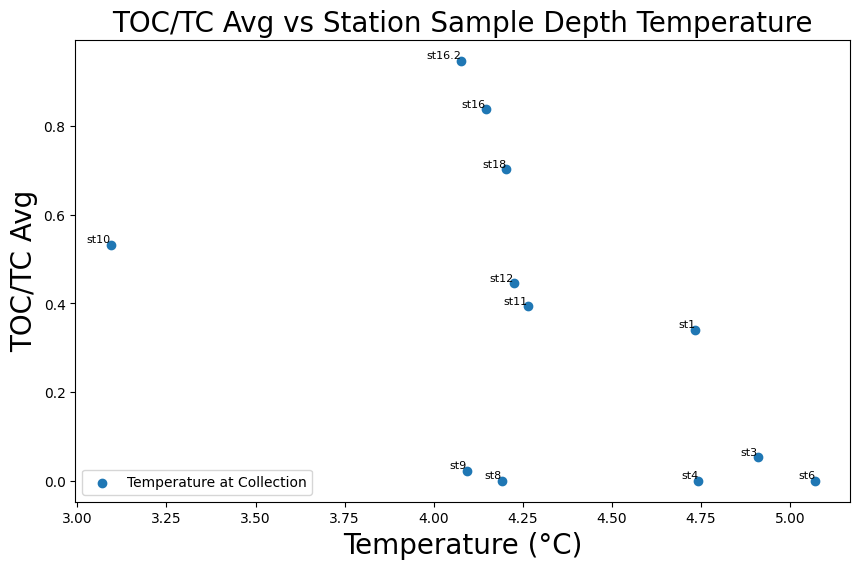

In [148]:

plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']


plt.scatter(os, toc_tc_avg, label ='Temperature at Collection')




plt.legend(loc = 'lower left') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Sample Depth Temperature", fontsize =20)


for x, y, label in zip(os, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()